**Protein's Native State and Free Energy**

The native state of a protein corresponds to its free energy minimum in solution. One of the primary objectives of various structural methods, including crystallography, is to determine this free energy minimum for the protein's structure.

The structure obtained from crystallographic methods provides a single set of atomic coordinates. This set represents the mean positions of atoms throughout the crystal structure. We often interpret this structure as corresponding to the global energy minimum.

**Free Energy of an Imaginary Protein**

Let's assume the free energy of an imaginary protein profile is given by the function:

$f(x)=5sin(5x)+10cos(3.5x)+3sin(2x^2)$

where free energy $f(x)$ is a function of coordinate$x$ .
If we plot this function for free energy, we can visualize its behavior.

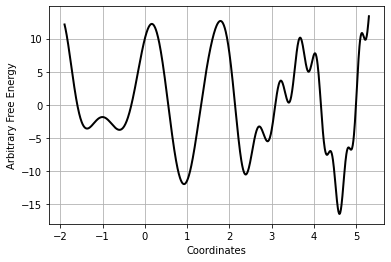

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the x-values
x = np.linspace(-1.9, 5.3, 1000)

# Create a composite function using sinusoidal functions
y = 5 *np.sin(5*x) + 10 * np.cos(3.5*x) +3*np.sin(2*x**2) 

# Plotting
fig, ax = plt.subplots()
plt.plot(x, y, 'k-', lw=2)
ax.set_xlabel("Coordinates")
ax.set_ylabel("Arbitrary Free Energy")
plt.grid(True)
plt.show()

In order to find the minima of the following function:
$f(x)=5sin(5x)+10cos(3.5x)+3sin(2x^2)$

First, we compute the first derivative, $f′(x)$.
Using the chain rule, we obtain:

$f′(x)=5(5cos(5x))−10(3.5sin(3.5x))+3(4xcos(2x2))$

$f′(x)=25cos⁡(5x)−35sin⁡(3.5x)+12xcos⁡(2x2)f′(x)=25cos(5x)−35sin(3.5x)+12xcos(2x2)$

Solving this manually can be quite challenging. Hence, we can employ the 'fmin' unction from the 'scipy.optimize' module to find the minima numerically.


It is found by the following:


In [3]:
import numpy as np
from scipy.optimize import fmin

# Define the target function
def f(x):
    return 5 * np.sin(5*x) + 10 * np.cos(3.5*x) + 3 * np.sin(2*x**2)

# Function to find minima starting from an initial guess
def find_minima(start):
    return fmin(f, start, disp=False)  # disp=False suppresses output

# Define the range
x_min, x_max = -1.9, 5.0

# Divide the range into smaller segments using uniform sampling
samples = np.linspace(x_min, x_max, 100)  # 100 sample points

# Find minima from each sample point
minima_points = [find_minima(sample) for sample in samples]

# De-duplicate the results (consider two minima same if they are closer than a tolerance)
tolerance = 0.01
unique_minima = []
for minima in minima_points:
    if not any(np.abs(minima - um) < tolerance for um in unique_minima):
        unique_minima.append(minima)


X_values =[]
Y_values =[]
for um in unique_minima:
    print(f"x = {um[0]:.4f}, f(x) = {f(um)[0]:.4f}")
    X_values.append(um[0])
    Y_values.append(f(um)[0])
    
    
minma_dict = dict(zip(X_values, Y_values)) 

x = -1.3666, f(x) = -3.5842
x = -0.6007, f(x) = -3.7759
x = 0.9269, f(x) = -11.9649
x = 2.3854, f(x) = -10.5138
x = 2.9032, f(x) = -5.5006
x = 3.4051, f(x) = 0.3351
x = 4.6041, f(x) = -16.4700
x = 3.8735, f(x) = 4.9947


In [110]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x, y, 'k-', lw=2)
ax.set_xlabel("Coordinates")
ax.set_ylabel(r"Arbitrary Free Energy ($kcal/mol$)")
plt.grid(True)
for k,v in minma_dict.items():
    plt.scatter(k,v, color='g', s=100, zorder=5)
    

    
plt.annotate('Deeper minima',xy=(2.3854,-10.5138),xytext=(1.0,-16.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Local minima',xy=(3.4051,0.3351),xytext=(2.5,12.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Local minima',xy=(-1.3666,-3.5842),xytext=(-1.5,-12.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Local minima',xy=(-0.6007,-3.7759),xytext=(-1.5,-12.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))

plt.annotate('Global minima',xy=(4.6041,-16.4700),xytext=(4.1,-23.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.tight_layout()
plt.savefig("Free_energy_plot.png",dpi=300)
plt.show()

<IPython.core.display.Javascript object>

In Crystallography, the objective is to find the global minima structure corresponding to the free energy profile. 
The default procedure is minimization of the structure to reach the local minima. For example as shown below.

In [106]:
%matplotlib notebook
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Create the function profile
x = np.linspace(-1.9, 5.3, 1000)
y = 5 *np.sin(5*x) + 10 * np.cos(3.5*x) +3*np.sin(2*x**2)

# Initialize the plot
fig, ax = plt.subplots()
ax.plot(x, y, 'k-',label="Minimization")
ax.annotate('Local minima',xy=(-0.6007,-3.7759),xytext=(-1.0,-12.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
ax.set_xlabel("Coordinates")
ax.set_ylabel(r"Arbitrary Free Energy ($kcal/mol$)")
ax.legend()

for k,v in minma_dict.items():
    plt.scatter(k,v, color='g', s=100, zorder=5)


# Red ball as particle
particle, = ax.plot([], [], 'ro', markersize=15)

# Define the positions where the particle will move
positions = [-1.5,-0.3,-0.58,-0.58]

def init():
    particle.set_data([], [])
    return particle,

def interpolate_positions(start, end, alpha):
    """Interpolate between two positions based on the interpolation factor alpha."""
    return start + alpha * (end - start)

def function_value(pos):
    return 5 *np.sin(5*pos) + 10 * np.cos(3.5*pos) +3*np.sin(2*pos**2)

def update(frame):
    total_frames = 100
    segment_length = total_frames / (len(positions) - 1)
    
    idx = int(frame // segment_length)
    alpha = (frame % segment_length) / segment_length
    
    if idx < len(positions) - 1:
        pos = interpolate_positions(positions[idx], positions[idx + 1], alpha)
        particle.set_data(pos, function_value(pos))
    
    return particle,

ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, repeat=True, interval=50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('minimization.gif', writer=writer)
HTML(ani.to_html5_video())


<IPython.core.display.Javascript object>

In the case the model is very far from the minima simulated	annealing technique 
is but this technique can be useful when
[when the model is far from convergence](https://phenix-online.org/documentation/faqs/refine.html#optimization-methods).


In [107]:
%matplotlib notebook
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Create the function profile
x = np.linspace(-1.9, 5.3, 1000)
y = 5 *np.sin(5*x) + 10 * np.cos(3.5*x) +3*np.sin(2*x**2)

# Initialize the plot
fig, ax = plt.subplots()
ax.plot(x, y, 'k-',label="Simulated annealing")
ax.annotate('Local minima',xy=(-0.6007,-3.7759),xytext=(-1.0,-12.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))

ax.annotate('Deeper minima',xy=(0.9269,-11.9649),xytext=(2.0,-14.0),fontsize=10,weight='bold',color='b',
             arrowprops=dict(arrowstyle='->',lw=1.5))
ax.set_xlabel("Coordinates")
ax.set_ylabel(r"Arbitrary Free Energy ($kcal/mol$)")
ax.legend()

for k,v in minma_dict.items():
    plt.scatter(k,v, color='g', s=100, zorder=5)

# Red ball as particle
particle, = ax.plot([], [], 'ro', markersize=15)

# Define the positions where the particle will move
positions = [-1.5,1.3,0.92,0.92]

def init():
    particle.set_data([], [])
    return particle,

def interpolate_positions(start, end, alpha):
    """Interpolate between two positions based on the interpolation factor alpha."""
    return start + alpha * (end - start)

def function_value(pos):
    return 5 *np.sin(5*pos) + 10 * np.cos(3.5*pos) +3*np.sin(2*pos**2)

def update(frame):
    total_frames = 100
    segment_length = total_frames / (len(positions) - 1)
    
    idx = int(frame // segment_length)
    alpha = (frame % segment_length) / segment_length
    
    if idx < len(positions) - 1:
        pos = interpolate_positions(positions[idx], positions[idx + 1], alpha)
        particle.set_data(pos, function_value(pos))
    
    return particle,

ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, repeat=True, interval=50)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('simulated_annealing.gif', writer=writer)
HTML(ani.to_html5_video())


<IPython.core.display.Javascript object>

In [ ]:
The alternate method is to sample the frames from the Molecular dynamics(MD) trajectory and use the co-ordinate for refinement using minimization. 

The main advantage of MD based sampling is that, It can identify minor samples. 
It can identify the global minima of the structure especially the idea is to sample the sidechain which might contribute to the function of the protein.  

In [108]:

fig, ax = plt.subplots()
ax.plot(x, y, 'k-',label="Coordinates from MD trajectory")
ax.set_xlabel("Coordinates")
ax.set_ylabel(r"Arbitrary Free Energy ($kcal/mol$)")
ax.legend()


for k,v in minma_dict.items():
    sc = plt.scatter(k,v, color='r', s=125, zorder=5)
    plt.scatter(k,v, color='g', s=100, zorder=5)
    
def animate(frame):
    # Bounce calculation (you can modify this for different bounce effects)
    bounce = np.abs(np.sin(frame * 0.2))  
    sc.set_offsets(np.c_[X_values, Y_values + bounce])  

anim = FuncAnimation(fig, animate, frames=100, interval=50, repeat=True)
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
anim.save('MD.gif', writer=writer)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>